<a href="https://colab.research.google.com/github/ashmafee-iut/Learning-Coding/blob/main/Image_Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is a **multimodal technique** which involves both convolutional Neural Network and Recurrent Neural Network. 

Variants of CNN:
 - VGG16, VGG19
 - ResNet

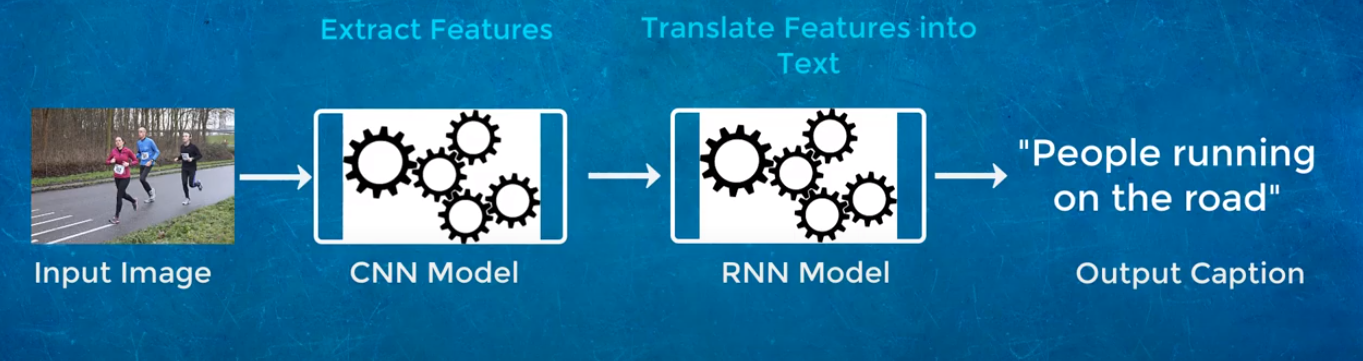

Applications:
 - Image search tools
 - Guidance Device for blinds
 - Self driving cars  

[Flickr_8K dataset](https://forms.illinois.edu/sec/1713398)

Having 8K images with 5 captions each

train:valid:test = 6k:1k:1k 

In [1]:
#Import Necessary Libraries
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [2]:
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
  # as we are not classifying the features, so we are removing the last layer
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo and store them in the dictionary
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

**Some context based on the above function "extract_features"**

 - VGG16 model is used to make classification based on extracted features from given images.
  - But, here we are not classifying the extracted features rather passed them into subsequent RNN model. So, the last layer ig VGG16 will be removed in this case. 
 - all the features should stored based on the given image, so a dictionary is used to store those features according to the corresponding images.  
 - **listdir()** is used to get the list of all files and directories in the specified directory.

**Importing file from google drive**

In [3]:
from google.colab import drive
drive.mount('/content/my_drive') 

Mounted at /content/my_drive


In [4]:
path_txt = "/content/my_drive/MyDrive/Image_Caption/Flickr8k_text.zip"
path_img = "/content/my_drive/MyDrive/Image_Caption/Flickr8k_Dataset.zip"

**Make a directory inside the colab's working directory**

In [5]:
!mkdir Image_Caption

**copy the folder from the drive to colab**

In [6]:
!cp /content/my_drive/MyDrive/Image_Caption/Flickr8k_text.zip /content/Image_Caption
!cp /content/my_drive/MyDrive/Image_Caption/Flickr8k_Dataset.zip /content/Image_Caption

**Unzip the zipped file**

In [7]:
from zipfile import ZipFile
with ZipFile("/content/Image_Caption/Flickr8k_text.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/Image_Caption/Flickr8k_text")

In [8]:
from zipfile import ZipFile
with ZipFile("/content/Image_Caption/Flickr8k_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/Image_Caption/Flickr8k_Dataset")

In [9]:
# extract features from all images
directory = '/content/Image_Caption/Flickr8k_Dataset/Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>2745811124_12c4426b8b.jpg
>482047956_9a29e9cee6.jpg
>3231880001_193a579b97.jpg
>2090386465_b6ebb7df2c.jpg
>350443876_c9769f5734.jpg
>3468346269_9d162aacfe.jpg
>56494233_1824005879.jpg
>2631300484_be8621d17b.jpg
>2287887341_663bfa15af.jpg
>3286761458_34af7e4499.jpg
>2268601066_b018b124fd.jpg
>1383840121_c092110917.jpg
>3256456935_664a7a5bba.jpg
>2883099128_0b056eed9e.jpg
>241347067_e58d05dbdc.jpg
>539705321_99406e5820.jpg
>3366571152_20afb88ac1.jpg
>3185409663_95f6b958d8.jpg
>3205214191_29b42b9b09.jpg
>3285214689_f0219e9671.jpg
>2335634931_7e9e8c2959.jpg
>3009018821_ba47396e24.jpg
>2709648336_15455e60b2.jpg
>3286045254_696c6b15bd.jpg
>3185787277_b412d7f5b7.jpg
>96420612_feb18fc6c6.jpg
>422763475_0bc814dac6.jpg
>3471571540_b4ab77f20d.jpg
>2689163361_4939875be5.jpg
>3708748633_e7e3cf4e84.jpg
>3046190891_05c6ecd9b6.jpg
>2732625904_4fbb653434.jpg
>2892395757_0a1b0eedd2.jpg
>263522013_d118d46b2d.jpg
>3339916063_63b960ed46.jpg
>3231596071_f0